In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('C:/Users/Artophilic/Datascience Bootcamp/Network_pract/Dataset/UNSW-NB15_4.csv')

In [4]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [5]:
df = df.drop(columns=["proto","service","state","attack_cat"])

In [6]:
df.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,0
1,2,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,0
2,3,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,0
3,4,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,0
4,5,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,0


In [7]:
df.isnull().sum()

id                   0
dur                  0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
label                0
dtype: int64

In [8]:
df.dtypes

id                     int64
dur                  float64
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_ltm       int64
ct_dst_sport_ltm       int64
ct_dst_src_ltm         int64
is_ftp_login  

In [9]:
len(df.loc[df['sbytes'] == " "])

0

In [10]:
#Splitting the data into independent and dependent data

X = df.drop(columns=['label']).copy()
X.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,1,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0
1,2,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0
2,3,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0
3,4,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0
4,5,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0


In [12]:
y = df['label'].copy()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [13]:
#One hot encoding : It is a technique to take data which is cateogrical
#and putting up in the format that most of the ML algo can use.
#Lots of ML algo natively support continuous non categorical data

y.unique()

array([0, 1])

In [ ]:
#XGboost uses sparse matrices which only deals with 1s and does not allocate memory to 0

In [14]:
sum(y)/len(y)

0.6806223302022916

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,stratify=y)

In [16]:
sum(y_train)/len(y_train)

0.680620508725904

In [17]:
sum(y_test)/len(y_test)

0.6806277945067981

In [ ]:
#We use stratify to keep the dependent dataset balance

In [32]:
clf_xbg = xgb.XGBClassifier()

In [38]:
import sklearn
evaluation=[(X_train,y_train)]
try:
    clf_xbg.fit(  
    X_train,  
    y_train,  
    eval_set= evaluation,  
    verbose = True)
except AttributeError:
    print("Found best iterations")

[0]	validation_0-logloss:0.40162
[1]	validation_0-logloss:0.28911
[2]	validation_0-logloss:0.21922
[3]	validation_0-logloss:0.17233
[4]	validation_0-logloss:0.13819
[5]	validation_0-logloss:0.11480
[6]	validation_0-logloss:0.09744
[7]	validation_0-logloss:0.08542
[8]	validation_0-logloss:0.07568
[9]	validation_0-logloss:0.06861
[10]	validation_0-logloss:0.06314
[11]	validation_0-logloss:0.05868
[12]	validation_0-logloss:0.05400
[13]	validation_0-logloss:0.05105
[14]	validation_0-logloss:0.04798
[15]	validation_0-logloss:0.04534
[16]	validation_0-logloss:0.04323
[17]	validation_0-logloss:0.04221
[18]	validation_0-logloss:0.04022
[19]	validation_0-logloss:0.03929
[20]	validation_0-logloss:0.03645
[21]	validation_0-logloss:0.03578
[22]	validation_0-logloss:0.03336
[23]	validation_0-logloss:0.03220
[24]	validation_0-logloss:0.03167
[25]	validation_0-logloss:0.03136
[26]	validation_0-logloss:0.03030
[27]	validation_0-logloss:0.02930
[28]	validation_0-logloss:0.02883
[29]	validation_0-loglos

In [40]:
y_pred = clf_xbg.predict(X_test)

In [41]:
print(confusion_matrix(y_pred,y_test))

[[13882   122]
 [  118 29714]]


In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14004
           1       1.00      1.00      1.00     29832

    accuracy                           0.99     43836
   macro avg       0.99      0.99      0.99     43836
weighted avg       0.99      0.99      0.99     43836



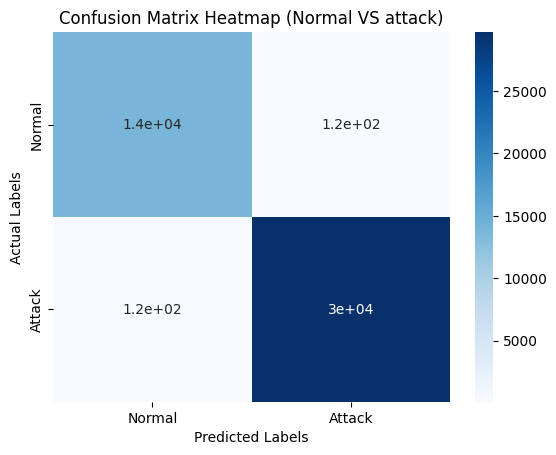

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
Confusion_mat = confusion_matrix(y_pred,y_test)
sns.heatmap(Confusion_mat, cmap='Blues', annot=True)
plt.xticks(np.arange(2)+0.5, ['Normal','Attack'])
plt.yticks(np.arange(2)+0.5, ['Normal','Attack'])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix Heatmap (Normal VS attack)")
plt.show()

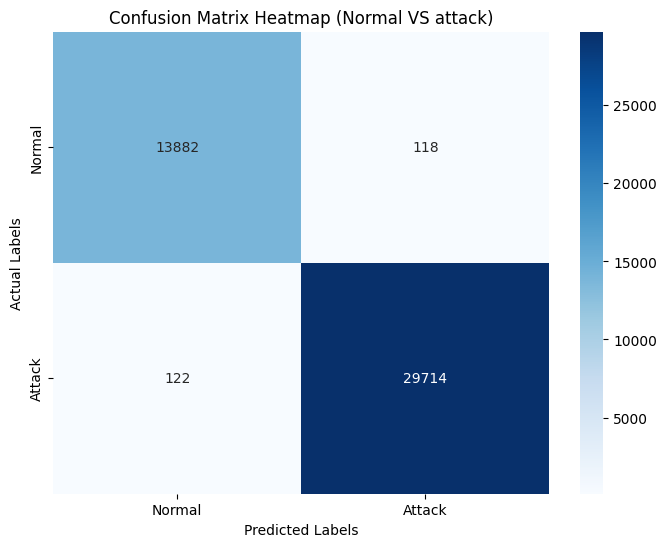

In [46]:
cm = np.array([[13882, 118], [122, 29714]])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, cmap='Blues', annot=True, fmt='d')
plt.xticks(np.arange(2)+0.5, ['Normal','Attack'])
plt.yticks(np.arange(2)+0.5, ['Normal','Attack'])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix Heatmap (Normal VS attack)")
plt.show()